Q1.a

In [71]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

taxis = pd.read_csv('taxis.csv', encoding= 'unicode_escape')
taxis_df = pd.DataFrame(taxis)
# Converting the dates into datetime objects and storing into columns accordingly
taxis_df['pickup_date'] = pd.to_datetime(taxis_df['pickup']).dt.day
taxis_df['pickup_time'] = pd.to_datetime(taxis_df['pickup']).dt.time
taxis_df['dropoff_date'] = pd.to_datetime(taxis_df['dropoff']).dt.day
taxis_df['dropoff_time'] = pd.to_datetime(taxis_df['dropoff']).dt.time
print("Q.1a The following is after adding new columns in DataFrame:")
print(taxis_df.head(5))
print()



Q.1a The following is after adding new columns in DataFrame:
                pickup              dropoff  passengers  distance  fare   tip  \
0  2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0  2.15   
1  2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0  0.00   
2  2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37   7.5  2.36   
3  2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0  6.15   
4  2019-03-30 13:27:42  2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  pickup_date  \
0

Q.1 b

In [72]:
taxis_df['travel_time'] = pd.to_datetime(taxis_df['dropoff']) - pd.to_datetime(taxis_df['pickup'])
print("Q1b The following are the results for Green Coloured Taxis:")
# Display the results for the Green coloured Taxis
print("The total fare of Green colured taxis is: " + str(taxis_df.loc[taxis_df['color'] == 'green', 'fare'].sum()))
print("The total number of passengers in Green colured taxis is: " + str(taxis_df.loc[taxis_df['color'] == 'green', 'passengers'].sum()))
print("The total distance travelled by Green colured taxis is: " + str(taxis_df.loc[taxis_df['color'] == 'green', 'distance'].sum()))
print("The total time travelled by Green colured taxis is: " + str(taxis_df.loc[taxis_df['color'] == 'green', 'travel_time'].sum()))
print("\nQ1b The following are the results for Yellow Coloured Taxis:")
# Display the results for the Yellow coloured Taxis
print("The total fare of Yellow colured taxis is: " +  str(taxis_df.loc[taxis_df['color'] == 'yellow', 'fare'].sum()))
print("The total number of passengers in Yellow colured taxis is: " + str(taxis_df.loc[taxis_df['color'] == 'yellow', 'passengers'].sum()))
print("The total distance travelled by Yellow colured taxis is: " + str(taxis_df.loc[taxis_df['color'] == 'yellow', 'distance'].sum()))
print("The total time travelled by Yellow colured taxis is: " + str(taxis_df.loc[taxis_df['color'] == 'yellow', 'travel_time'].sum()))
print()


Q1b The following are the results for Green Coloured Taxis:
The total fare of Green colured taxis is: 13788.15
The total number of passengers in Green colured taxis is: 1226
The total distance travelled by Green colured taxis is: 3345.95
The total time travelled by Green colured taxis is: 10 days 15:37:46

Q1b The following are the results for Yellow Coloured Taxis:
The total fare of Yellow colured taxis is: 70426.72
The total number of passengers in Yellow colured taxis is: 8676
The total distance travelled by Yellow colured taxis is: 16111.41
The total time travelled by Yellow colured taxis is: 53 days 10:53:19



Q. 2

In [73]:

pickup_dates = [10, 15, 20, 25, 30]
filtered_data = taxis_df[(taxis_df['payment'] == 'cash') & (taxis_df['pickup_date'].isin(pickup_dates))]

grouped = filtered_data.groupby('color')

# Initialize an empty DataFrame to store the results
GY_cash = pd.DataFrame(columns=['color', 'distance', 'pickup', 
                                'pickup_date', 'pickup_time', 'dropoff', 'dropoff_date', 'dropoff_time', 'fare'])
GY_cash_list = []
for pickup_date in pickup_dates:
    for cab_color in ['green', 'yellow']:
        date_filtered_data = filtered_data[(filtered_data['pickup_date'] == pickup_date) & (filtered_data['color'] == cab_color)]
        
        if not date_filtered_data.empty:
            # Find the trip with the longest distance for the current date
            longest_distance_trip = date_filtered_data.loc[date_filtered_data['distance'].idxmax()]
            # Append the longest distance trip to the GY_cash_list
            GY_cash_list.append(longest_distance_trip)
        else:
            # If there are no trips for the current date, add a row with 0 values
            GY_cash_list.append({'pickup_date': pickup_date, 'colour': cab_color, 'distance': 0})

GY_cash = pd.DataFrame(GY_cash_list, columns=['color', 'distance', 'pickup', 'pickup_date', 'pickup_time', 'dropoff', 'dropoff_date', 'dropoff_time', 'fare'])

# Create the GY_cash DataFrame with appopriate columns
GY_cash = GY_cash.reset_index(drop=True)
GY_cash = GY_cash.rename(columns={'distance': 'distance travelled', 'color': 'Color of the Cab' })
# Display the GY_cash DataFrame
print("Q2 The following is the GY_cash Dataframe, with displaying only top 5 rows")
print(GY_cash.head(5).to_string(index=False))


Q2 The following is the GY_cash Dataframe, with displaying only top 5 rows
Color of the Cab  distance travelled              pickup  pickup_date pickup_time             dropoff  dropoff_date dropoff_time  fare
           green               16.01 2019-03-10 00:59:49           10    00:59:49 2019-03-10 01:36:25            10     01:36:25  47.0
          yellow               11.52 2019-03-10 00:13:12           10    00:13:12 2019-03-10 00:33:09            10     00:33:09  32.5
           green                4.71 2019-03-15 06:42:17           15    06:42:17 2019-03-15 06:54:38            15     06:54:38  15.0
          yellow               15.64 2019-03-15 16:45:55           15    16:45:55 2019-03-15 17:46:47            15     17:46:47  50.0
           green                6.66 2019-03-20 12:04:33           20    12:04:33 2019-03-20 12:28:07            20     12:28:07  20.0


Q.3 

In [74]:
max_distances = GY_cash.groupby('pickup_date')['distance travelled'].max().reset_index()

GY_maxDist = pd.merge(GY_cash, max_distances, on=['pickup_date', 'distance travelled'], how='inner')


# Display the GY_maxDist DataFrame
print("Q3 The following is the GY_maxDist Dataframe, with displaying only top 5 rows")
print(GY_maxDist.to_string(index=False))
print()

Q3 The following is the GY_maxDist Dataframe, with displaying only top 5 rows
Color of the Cab  distance travelled              pickup  pickup_date pickup_time             dropoff  dropoff_date dropoff_time  fare
           green               16.01 2019-03-10 00:59:49           10    00:59:49 2019-03-10 01:36:25            10     01:36:25  47.0
          yellow               15.64 2019-03-15 16:45:55           15    16:45:55 2019-03-15 17:46:47            15     17:46:47  50.0
          yellow               17.01 2019-03-20 17:22:33           20    17:22:33 2019-03-20 18:07:19            20     18:07:19  52.0
          yellow               12.12 2019-03-25 05:33:43           25    05:33:43 2019-03-25 05:58:38            25     05:58:38  35.5
          yellow               17.14 2019-03-30 14:56:08           30    14:56:08 2019-03-30 15:49:32            30     15:49:32  52.0



Q.4 

In [75]:
def calculate_speed(row):
    distance_km = row['distance travelled']

    start_time = pd.to_datetime(row['pickup'])
    end_time = pd.to_datetime(row['dropoff'])
    
    # Calculate the time difference in seconds
    time_seconds = (end_time - start_time).total_seconds()
    
    # Calculate speed in m/s
    speed = (distance_km * 1000) / time_seconds
    
    return speed

GY_maxDist['speed'] = GY_maxDist.apply(calculate_speed, axis=1)

# Display the new GY_maxDist DataFrame
print("Q4 The following is the GY_maxDist Dataframe with'speed' as new feature, with displaying only top 5 rows")
print(GY_maxDist.to_string(index=False))

Q4 The following is the GY_maxDist Dataframe with'speed' as new feature, with displaying only top 5 rows
Color of the Cab  distance travelled              pickup  pickup_date pickup_time             dropoff  dropoff_date dropoff_time  fare    speed
           green               16.01 2019-03-10 00:59:49           10    00:59:49 2019-03-10 01:36:25            10     01:36:25  47.0 7.290528
          yellow               15.64 2019-03-15 16:45:55           15    16:45:55 2019-03-15 17:46:47            15     17:46:47  50.0 4.282585
          yellow               17.01 2019-03-20 17:22:33           20    17:22:33 2019-03-20 18:07:19            20     18:07:19  52.0 6.332837
          yellow               12.12 2019-03-25 05:33:43           25    05:33:43 2019-03-25 05:58:38            25     05:58:38  35.5 8.107023
          yellow               17.14 2019-03-30 14:56:08           30    14:56:08 2019-03-30 15:49:32            30     15:49:32  52.0 5.349563


Q.5 

In [86]:
# Filter the DataFrame for trips from 'Brooklyn' to 'Manhattan' with pickup dates between March 10 and March 25
filtered_trips = taxis_df[(taxis_df['pickup_borough'] == 'Brooklyn') & (taxis_df['dropoff_borough'] == 'Manhattan') & (taxis_df['pickup_date'].between(10, 25)) ]

def calculate_speed(row):
    distance_km = row['distance'] 
    start_time = pd.to_datetime(row['pickup'])
    end_time = pd.to_datetime(row['dropoff'])
    
    # Calculate the time difference in seconds
    time_seconds = (end_time - start_time).total_seconds()
    
    # Calculate speed in m/s
    speed = (distance_km * 1000) / time_seconds
    
    return speed

filtered_trips.loc[:, 'speed'] = filtered_trips.apply(calculate_speed, axis=1)


# Compute the mean speed for green and yellow cars separately

mean_speed_green = filtered_trips.loc[filtered_trips['color'] == 'green']['speed'].mean()
mean_speed_yellow = filtered_trips.loc[filtered_trips['color'] == 'yellow']['speed'].mean()

# Display  mean speed of green and yellow cars respectively
print("Q5 The following is the output the mean speed of green cars and mean speed of yellow cars.")
print(f"Mean speed of green cars: {mean_speed_green} m/s")
print(f"Mean speed of yellow cars: {mean_speed_yellow} m/s")
print()


Q5 The following is the output the mean speed of green cars and mean speed of yellow cars.
Mean speed of green cars: 3.3573598559543405 m/s
Mean speed of yellow cars: 4.203137975821648 m/s



Q.6 

In [77]:
filtered_trips = taxis_df[(taxis_df['pickup_date'] == 17) &    
                          ((pd.to_datetime(taxis_df['pickup']).dt.time >= pd.to_datetime('14:30:00').time()) & # 2:30 PM
                           (pd.to_datetime(taxis_df['pickup']).dt.time <= pd.to_datetime('16:00:00').time()))]  # 4:00 PM
  # 4:00 PM
# Group by color and count pickups for each color
pickup_counts = filtered_trips.groupby('color').size().reset_index(name='pickup_count')

#  Determine which color had more pickups
most_picked_color = pickup_counts[pickup_counts['pickup_count'] == pickup_counts['pickup_count'].max()]

# Display which colour had the maximum pickups between 2.30pm and 4pm on March 17th
print(f"Q.6 Color with the most pickups between 2:30 PM and 4:00 PM on March 17th is {most_picked_color['color'].to_string(index=False).title()} with {most_picked_color['pickup_count'].to_string(index=False)} pickup counts")
print()

Q.6 Color with the most pickups between 2:30 PM and 4:00 PM on March 17th is Yellow with 14 pickup counts



Q.7

In [78]:
grouped_data = taxis_df.groupby('pickup_zone')

#  Calculate the required statistics for each group
result_df = grouped_data.agg({
    'passengers': ['sum', 'min', 'max',],
    'fare': ['sum', 'min', 'max',]
}).reset_index()

# Rename the columns for using subheaders
header = pd.MultiIndex.from_product([['passengers','fare'],
                                     ['sum', 'min', 'max',]])
result_df.columns = pd.MultiIndex.from_tuples([('', 'pickup_zone')]  + list(header))


# Display the first 5 rows of the resulting DataFrame with min, max
print("Q.7 The resulting DataFrame is:\n")
print(result_df.head().to_string(index=False))
print()


Q.7 The resulting DataFrame is:

                        passengers           fare           
            pickup_zone        sum min max    sum  min   max
Allerton/Pelham Gardens          2   1   1  64.66 10.5 54.16
          Alphabet City         11   1   2 107.50  5.0 28.50
                Astoria        102   1   6 514.50  2.5 36.50
             Auburndale          1   1   1  21.40 21.4 21.40
           Battery Park          6   6   6  19.00 19.0 19.00



Q.8 

In [82]:
# Calculate the fuel cost for each trip
taxis_df['fuel_cost'] = (taxis_df['distance'] * 5.5) / 100 * 3

# Group the DataFrame by "pickup_zone" and "color"
grouped_data = taxis_df.groupby(['pickup_zone', 'color'])

def count_dates(series):
    return series.count()

# Calculate the required statistics for each group
result_df = grouped_data.agg({
    'pickup_date': count_dates,
    'passengers': 'sum',
    'distance': 'sum',
    'fare': 'sum',
    'fuel_cost': 'sum'
}).reset_index()


result_df.columns = ['pickup_zone', 'color', 'num_trips', 'total_passengers', 'total_distance', 'total_fare', 'total_fuel_cost']

# Split the result into two separate DataFrames, one for Yellow and one for Green cabs
Yellow_stats_df = result_df[result_df['color'] == 'yellow'].reset_index(drop=True)
Green_stats_df = result_df[result_df['color'] == 'green'].reset_index(drop=True)

# Display the resulting DataFrames
print("Q.8 The following are the Dataframes for the Yellow and Grren Taxis :\n")
print("Yellow Cab Statistics DataFrame:")
print(Yellow_stats_df.head(5).to_string(index=False))
print("\nGreen Cab Statistics DataFrame:")
print(Green_stats_df.head(5).to_string(index=False))
print()



Q.8 The following are the Dataframes for the Yellow and Grren Taxis :

Yellow Cab Statistics DataFrame:
            pickup_zone   color  num_trips  total_passengers  total_distance  \
0         Alphabet City  yellow          9                11           25.17   
1               Astoria  yellow         13                18           23.38   
2          Battery Park  yellow          1                 6            5.39   
3     Battery Park City  yellow         43                59          174.16   
4               Bedford  yellow          1                 1            5.80   
..                  ...     ...        ...               ...             ...   
117     Windsor Terrace  yellow          1                 4            5.80   
118            Woodside  yellow          1                 1            2.12   
119  World Trade Center  yellow         24                36          110.19   
120      Yorkville East  yellow         71               103          163.28   
121      Yorkvil

Q.9 

In [80]:
# Total statistics for Yellow cars
total_yellow_passengers = Yellow_stats_df['total_passengers'].sum()
total_yellow_distance = Yellow_stats_df['total_distance'].sum()
total_yellow_fare = Yellow_stats_df['total_fare'].sum()
total_yellow_fuel_cost = Yellow_stats_df['total_fuel_cost'].sum()

# Total statistics for Green cars
total_green_passengers = Green_stats_df['total_passengers'].sum()
total_green_distance = Green_stats_df['total_distance'].sum()
total_green_fare = Green_stats_df['total_fare'].sum()
total_green_fuel_cost = Green_stats_df['total_fuel_cost'].sum()

# Display the results
print("Q.9 The following are the statistics for the Yellow and Grren Taxis :\n")
print("Total Statistics for Yellow Cars:")
print(f"Total Passengers: {Yellow_stats_df['total_passengers'].sum()}")
print(f"Total Distance (in kms): {Yellow_stats_df['total_distance'].sum()}")
print(f"Total Fare: ${Yellow_stats_df['total_fare'].sum()}")
print(f"Total Fuel Cost: ${Yellow_stats_df['total_fuel_cost'].sum()}")

print("\nTotal Statistics for Green Cars:")
print(f"Total Passengers: {Green_stats_df['total_passengers'].sum()}")
print(f"Total Distance (in kms): {Green_stats_df['total_distance'].sum()}")
print(f"Total Fare: ${Green_stats_df['total_fare'].sum()}")
print(f"Total Fuel Cost: ${Green_stats_df['total_fuel_cost'].sum()}")


Q.9 The following are the statistics for the Yellow and Grren Taxis :

Total Statistics for Yellow Cars:
Total Passengers: 8649
Total Distance (in kms): 16058.769999999999
Total Fare: $69781.22
Total Fuel Cost: $2649.69705

Total Statistics for Green Cars:
Total Passengers: 1222
Total Distance (in kms): 3345.95
Total Fare: $13760.65
Total Fuel Cost: $552.08175


Q.10

Q.10 The following are the Charts that we plot for each colour:

Bar Chart for Total Number of Passengers Traveled - Yellow



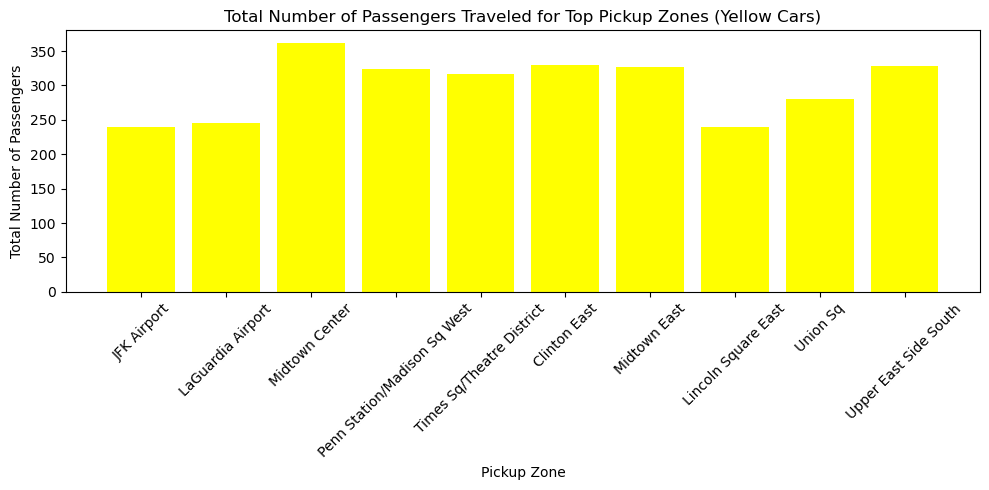


Bar Chart for Total Number of Passengers Traveled - Green



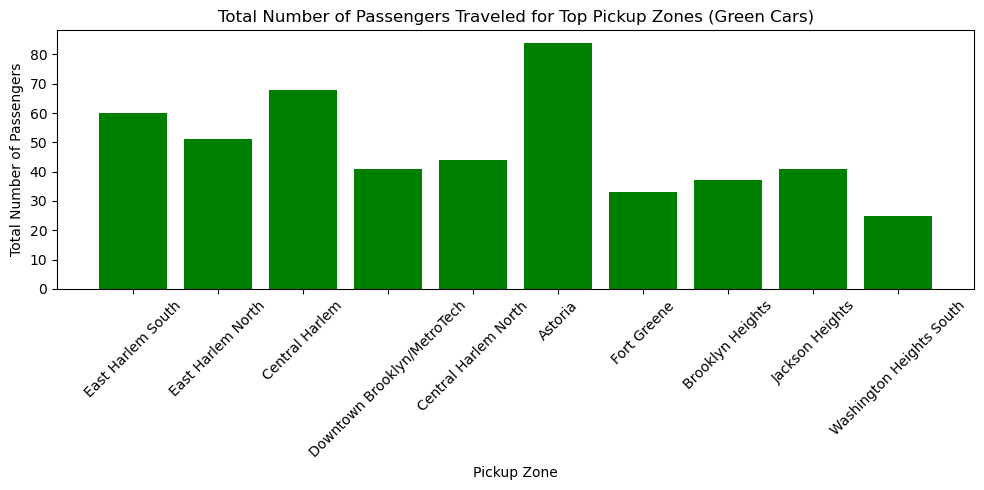


Bar Chart for Total Distance Traveled - Yellow



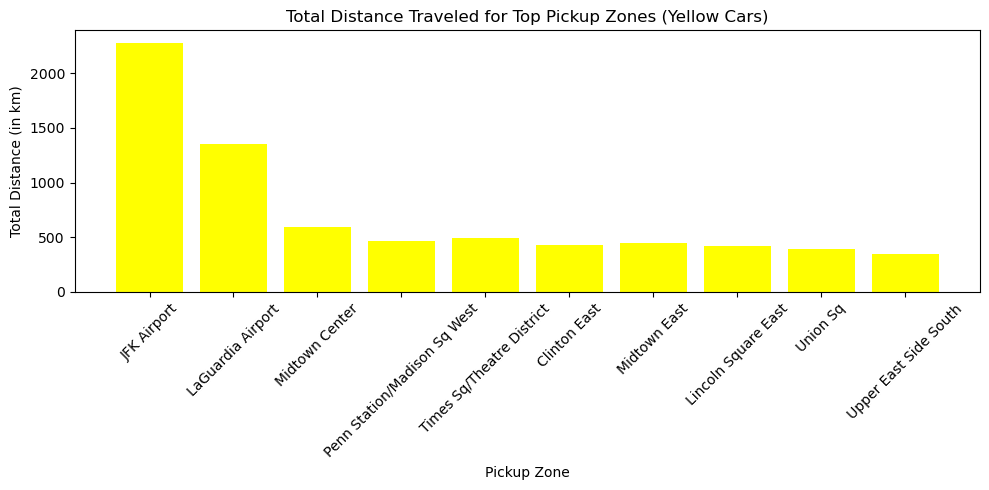


Bar Chart for Total Distance Traveled - Green



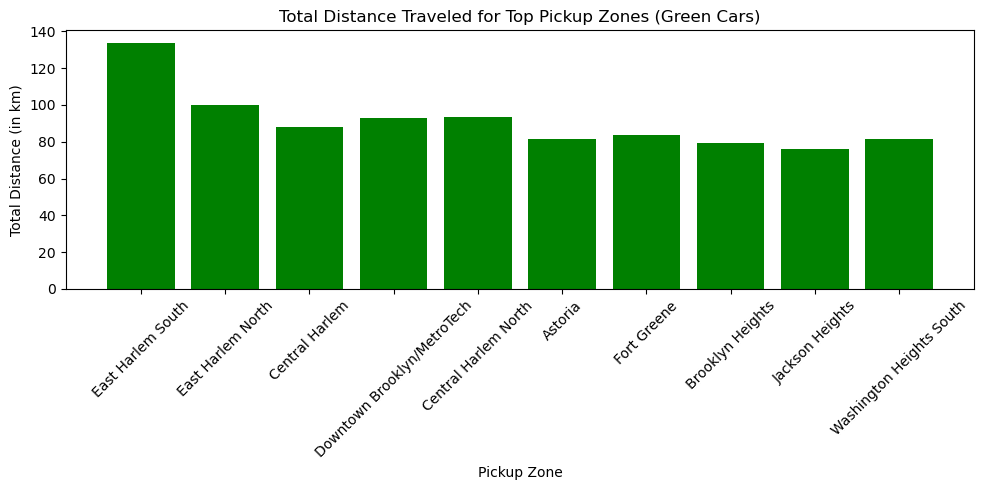


 Bar Chart for Total Fare - Yellow


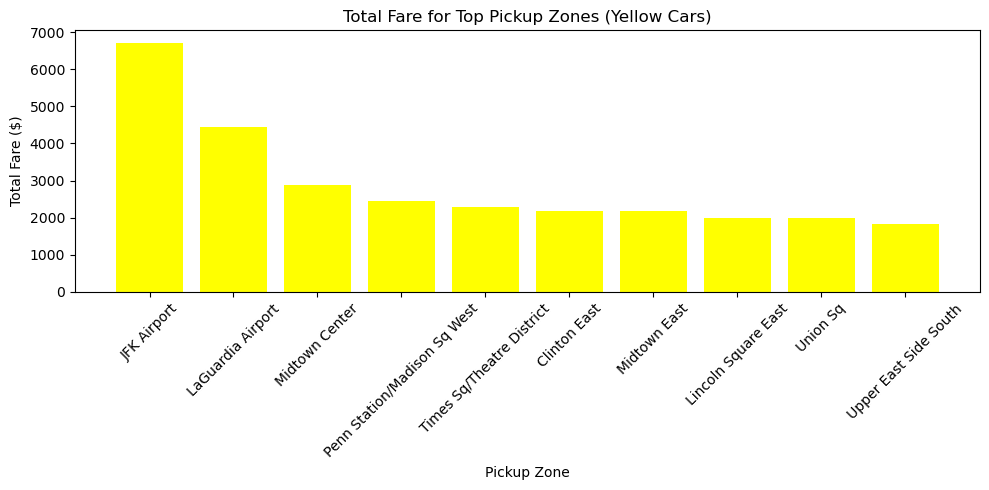


 Bar Chart for Total Fare - Green


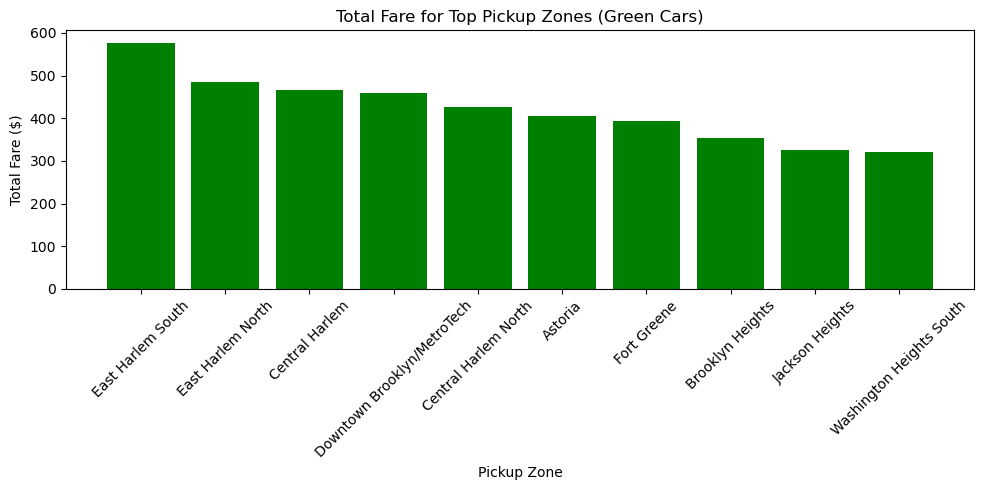


Bar Chart for Number of Trips Made - Yellow


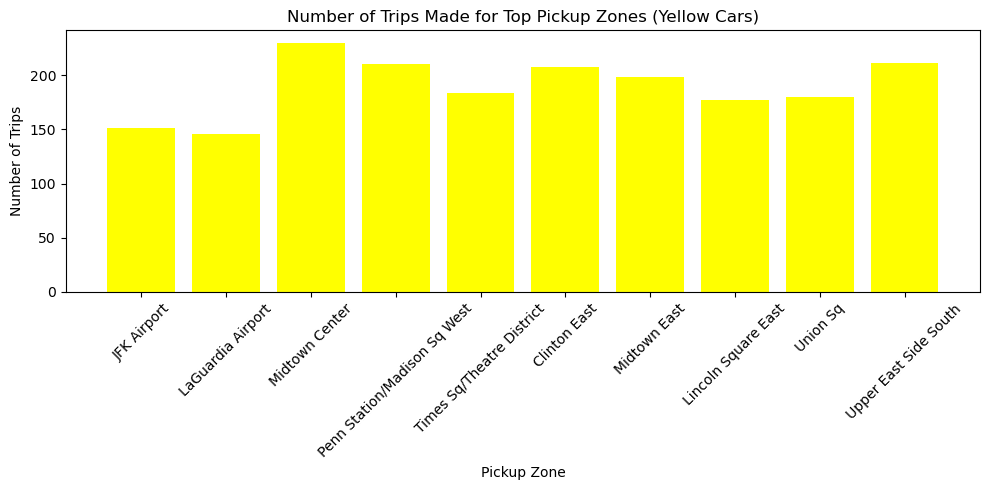


Bar Chart for Number of Trips Made - Green


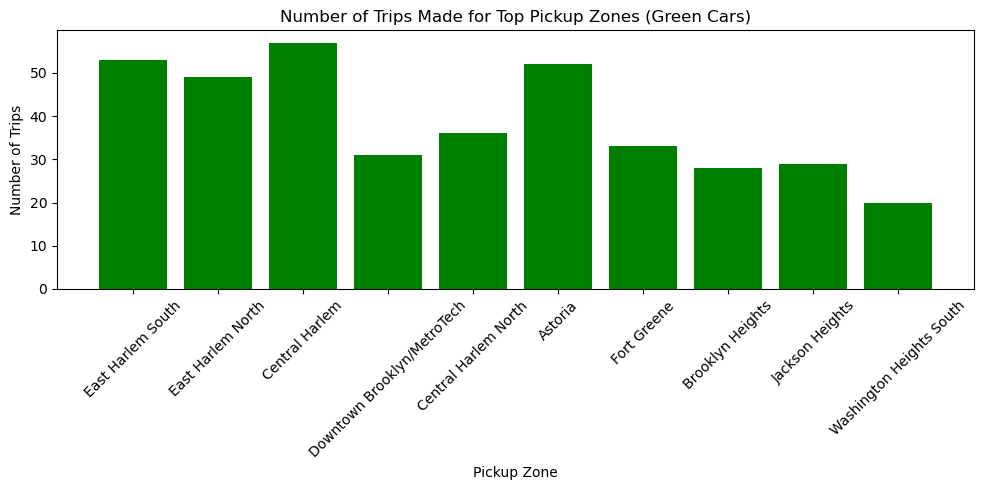


Pie Chart for Total Cost Fare Yielded by Zones - Yellow



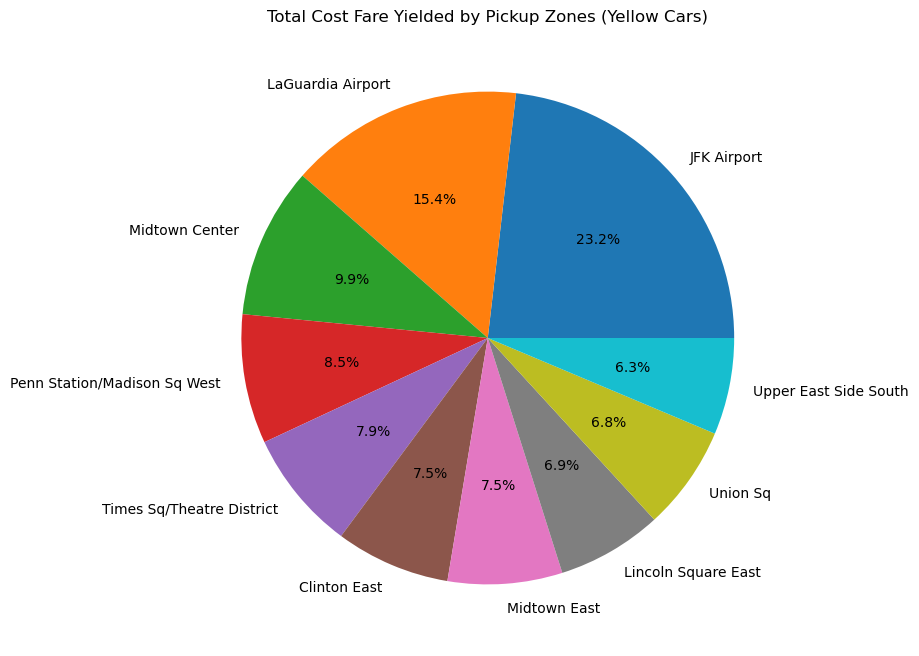


Pie Chart for Total Cost Fare Yielded by Zones - Green



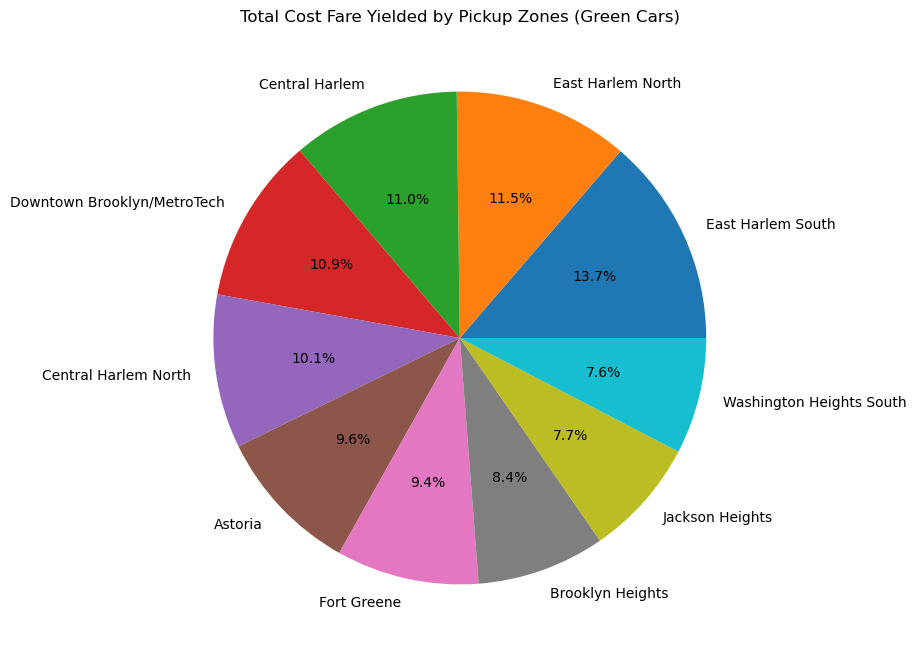


Pie Chart for Total Fuel Cost by Zones - Yellow



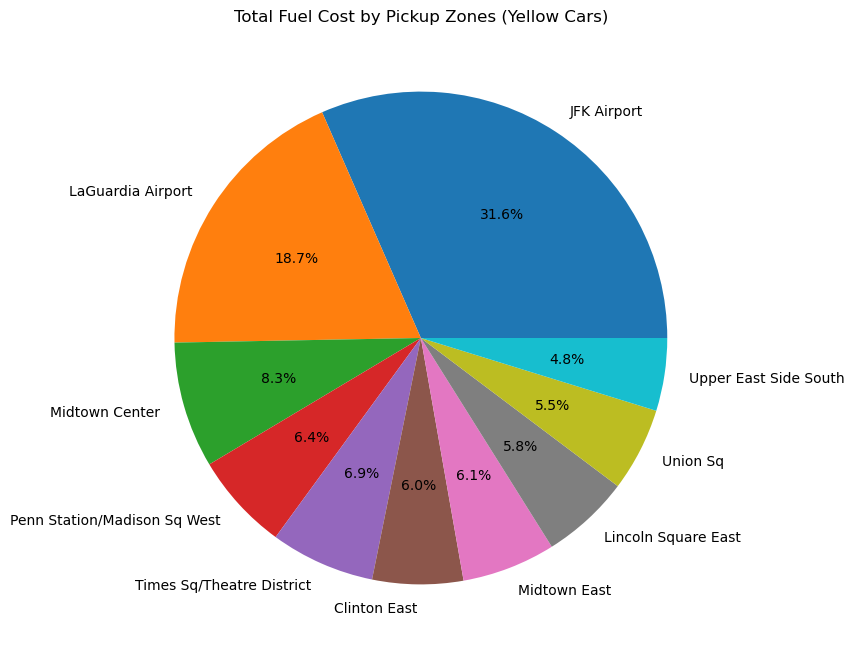


Pie Chart for Total Fuel Cost by Zones - Green



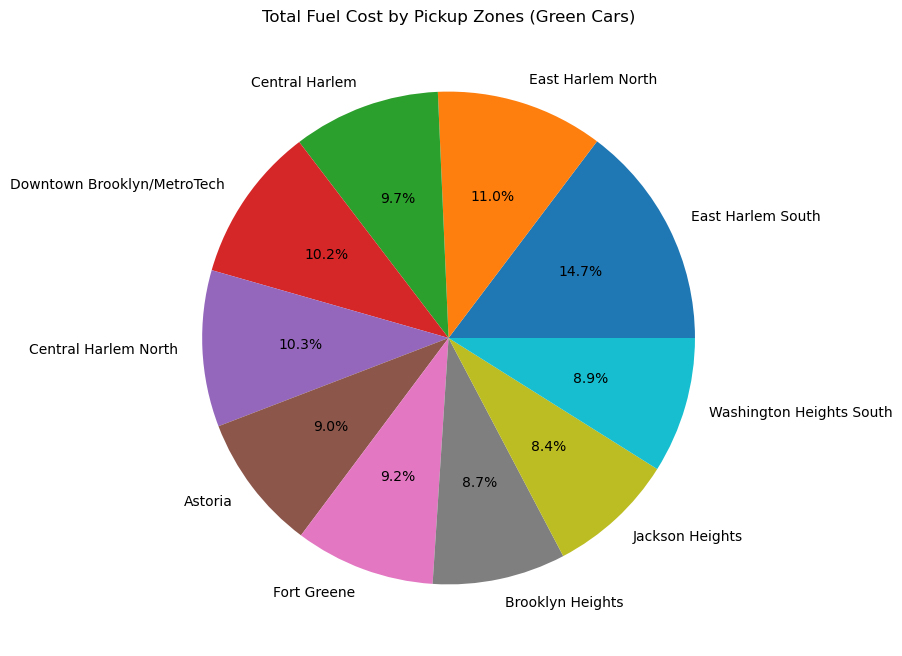

In [81]:
# Sort in descending order and select the top 10 pickup zones
top_yellow_zones = Yellow_stats_df.sort_values(by='total_fare', ascending=False).head(10)
top_green_zones = Green_stats_df.sort_values(by='total_fare', ascending=False).head(10)

print("Q.10 The following are the Charts that we plot for each colour:\n")


# Function to generate a bar chart
def generate_bar_chart(data, x_label, y_label, title):
    plt.figure(figsize=(10, 5))
    plt.bar(data['pickup_zone'], data['value'], color=data['color'])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print()

# Function to generate a pie chart
def generate_pie_chart(data, title):
    plt.figure(figsize=(8, 8))
    plt.pie(data['value'], labels=data['pickup_zone'], autopct='%1.1f%%')
    plt.title(title)
    plt.show()
    print()

# Bar Chart for Total Number of Passengers Traveled - Yellow
print("Bar Chart for Total Number of Passengers Traveled - Yellow\n")
bar_data_y = {
    'pickup_zone': top_yellow_zones['pickup_zone'],
    'value': top_yellow_zones['total_passengers'],
    'color': 'yellow'
}
generate_bar_chart(bar_data_y, 'Pickup Zone', 'Total Number of Passengers', 'Total Number of Passengers Traveled for Top Pickup Zones (Yellow Cars)')

# Bar Chart for Total Number of Passengers Traveled - Green
print("Bar Chart for Total Number of Passengers Traveled - Green\n")
bar_data_g = {
    'pickup_zone': top_green_zones['pickup_zone'],
    'value': top_green_zones['total_passengers'],
    'color': 'green'
}
generate_bar_chart(bar_data_g, 'Pickup Zone', 'Total Number of Passengers', 'Total Number of Passengers Traveled for Top Pickup Zones (Green Cars)')

# Bar Chart for Total Distance Traveled - Yellow
print("Bar Chart for Total Distance Traveled - Yellow\n")
bar_data_y['value'] = top_yellow_zones['total_distance']
generate_bar_chart(bar_data_y, 'Pickup Zone', 'Total Distance (in km)', 'Total Distance Traveled for Top Pickup Zones (Yellow Cars)')

# Bar Chart for Total Distance Traveled - Green
print("Bar Chart for Total Distance Traveled - Green\n")
bar_data_g['value'] = top_green_zones['total_distance']
generate_bar_chart(bar_data_g, 'Pickup Zone', 'Total Distance (in km)', 'Total Distance Traveled for Top Pickup Zones (Green Cars)')


# Bar Chart for Total Fare - Yellow
print(" Bar Chart for Total Fare - Yellow")
bar_data_y['value'] = top_yellow_zones['total_fare']
generate_bar_chart(bar_data_y, 'Pickup Zone', 'Total Fare ($)', 'Total Fare for Top Pickup Zones (Yellow Cars)')

# Bar Chart for Total Fare - Green
print(" Bar Chart for Total Fare - Green")
bar_data_g['value'] = top_green_zones['total_fare']
generate_bar_chart(bar_data_g, 'Pickup Zone', 'Total Fare ($)', 'Total Fare for Top Pickup Zones (Green Cars)')

# Bar Chart for Number of Trips Made - Yellow
print("Bar Chart for Number of Trips Made - Yellow")
bar_data_y['value'] = top_yellow_zones['num_trips']
generate_bar_chart(bar_data_y, 'Pickup Zone', 'Number of Trips', 'Number of Trips Made for Top Pickup Zones (Yellow Cars)')

# Bar Chart for Number of Trips Made - Green
print("Bar Chart for Number of Trips Made - Green")
bar_data_g['value'] = top_green_zones['num_trips']
generate_bar_chart(bar_data_g, 'Pickup Zone', 'Number of Trips', 'Number of Trips Made for Top Pickup Zones (Green Cars)')

# Pie Chart for Total Cost Fare Yielded by Zones - Yellow
print("Pie Chart for Total Cost Fare Yielded by Zones - Yellow\n")
pie_data_y = {
    'pickup_zone': top_yellow_zones['pickup_zone'],
    'value': top_yellow_zones['total_fare']
}
generate_pie_chart(pie_data_y, 'Total Cost Fare Yielded by Pickup Zones (Yellow Cars)')

# Pie Chart for Total Cost Fare Yielded by Zones - Green
print("Pie Chart for Total Cost Fare Yielded by Zones - Green\n")
pie_data_g = {
    'pickup_zone': top_green_zones['pickup_zone'],
    'value': top_green_zones['total_fare']
}
generate_pie_chart(pie_data_g, 'Total Cost Fare Yielded by Pickup Zones (Green Cars)')

# Pie Chart for Total Fuel Cost by Zones - Yellow
print("Pie Chart for Total Fuel Cost by Zones - Yellow\n")
pie_data_y['value'] = top_yellow_zones['total_fuel_cost']
generate_pie_chart(pie_data_y, 'Total Fuel Cost by Pickup Zones (Yellow Cars)')

# Pie Chart for Total Fuel Cost by Zones - Green
print("Pie Chart for Total Fuel Cost by Zones - Green\n")
pie_data_g['value'] = top_green_zones['total_fuel_cost']
generate_pie_chart(pie_data_g, 'Total Fuel Cost by Pickup Zones (Green Cars)')
